# Analysis of Three-phase Signals Using Singular Value Decomposition


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

This notebook presents some results of the paper entitled ["Monitoring of Three-Phase Signal based on Singular-Value Decomposition"](https://www.researchgate.net/publication/330941548_Monitoring_of_Three-Phase_Signals_based_on_Singular-Value_Decomposition). In particular, it shows that the SVD decomposition can be a natural alternative to the commonly used Clarke transform for the analysis of unbalanced three-phase signals. You can use this code without restriction (you simply have to add a clear reference to the paper  )



## Three-phase Signal Model

In power systems, it is usualy more convenient to transmit three-phase signals. Under nominal condition the three-phase signal has a particular structure. Indeed, each phase is simply composed of a $60$ Hz (or $50$ Hz) sine wave. Furthermore, the three phases are simply phase-shifted from each other by $2\pi/3$. In practice, many deviations can occur and the three-phase signal can be described by the following more general model ($k=0,1,2$):

$$x_k[n]=a_k \cos(2\pi n f_0/F_s +\phi_k)+b_k[n]$$

where $c_k=a_k e^{j\phi_k}$ correspond to the complex phasor on phase $k$, $f_0$ is the signal frequency and $F_s$ is the sampling rate. An additive signal $b_k[n]$ is usually introduce to model the presence of noise.




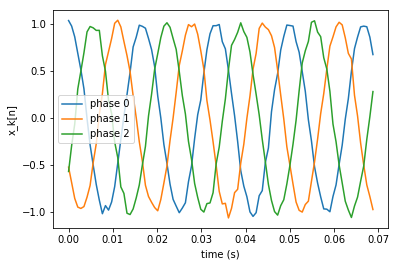

In [29]:
def create_signal(c_vect,f0=60,N=1000,Fs=24*60,sigma2=0.001):
    # Create three phase signal
    X = np.zeros((3,N))
    b_rv = norm(loc=0,scale=np.sqrt(sigma2))  # gaussian noise
    t_vect = np.arange(N)/Fs
    for k in range(3):
        X[k,:] = np.abs(c_vect[k])*np.cos(2*np.pi*f0*t_vect+np.angle(c_vect[k])) + b_rv.rvs(size=(1,N))

    return t_vect, X

def plot_signal(t,signal):
    for k in range(3):
        plt.plot(t,signal[k,:],label="phase {}".format(k))
    plt.xlabel("time (s)")
    plt.ylabel("x_k[n]")
    plt.legend()
        
k_vect = np.arange(3)
t, signal = create_signal(np.exp(2j*np.pi*k_vect/3),60,N=100)
plot_signal(t,signal)

## Clarke Transform

From a statistical viewpoint, it is usually interesting to reduce the dimension of multi-dimensional signal. in power electronic, a commonly used approach for dimensional reduction is the Clarke transform. The Clarke transform is a simple linear transform which can be expressed under matrix notations as

$$\begin{bmatrix}y_0[n]\\y_1[n]\end{bmatrix}=\begin{bmatrix}y_0[n]\\y_1[n]\end{bmatrix}\begin{bmatrix}x_0[n]\\x_1[n]\\ x_2[n]\end{bmatrix}$$